### Research Papers

- Class-Agnostic Counting  
Erika Lu, Weidi Xie, and Andrew Zisserman Visual Geometry Group, University of Oxford


- Learning To Count Objects in Images  
Victor Lempitsky and Andrew Zisserman


- Divide and Count: Generic Object Counting by Image Divisions  
Tobias Stahl, Silvia L. Pintea and Jan C. van Gemert


- People, Penguins and Petri Dishes: Adapting Object Counting Models To New Visual Domains And Object Types Without Forgetting  
Mark Marsden, Kevin McGuinness, Suzanne Little, Ciara E. Keogh, Noel E. O'Connor

etc.
    

In [1]:
downloads_dir = '/Users/udbhav/Downloads/CSE-523/'

### Coco Dataset

In [2]:
from pycocotools.coco import COCO
import numpy as np

In [3]:
dataDir = downloads_dir + 'Coco-dataset/coco'
dataType ='train2017'
annFile ='{}/annotations/instances_{}.json'.format(dataDir, dataType)

coco=COCO(annFile)

loading annotations into memory...
Done (t=13.42s)
creating index...
index created!


In [4]:
imgIds = coco.getImgIds()

catCount = dict()
supercatCount = dict()

for imgId in imgIds:
    annIds = coco.getAnnIds(imgIds=imgId)
    anns = coco.loadAnns(annIds)
    
    supercats = set()
    cats = set()
    
    for ann in anns:
        key = ann['category_id']
        catDesc = coco.loadCats([key])[0]
        supercat = catDesc['supercategory']
        cat = catDesc['name']
        
        if supercat not in supercatCount:
            supercatCount[supercat] = [0, 0]
        supercatCount[supercat][0] += 1
        
        if cat not in catCount:
            catCount[cat] = [0, 0]
        catCount[cat][0] += 1
        
        supercats.add(supercat)
        cats.add(cat)
            
    for supercat in supercats: supercatCount[supercat][1] += 1
    for cat in cats: catCount[cat][1] += 1

In [5]:
from prettytable import PrettyTable

def displayTable(colNames, sortby, countMap):
    t = PrettyTable(colNames)

    for k, v in countMap.items(): t.add_row([k, v[0], v[1], round(v[0]/(v[1]*1.0), 2)])
    t.sortby = sortby
    t.reversesort = True
    
    print(t)

In [6]:
displayTable(['Supercategory', 'Total Object Count', 'Image Count', 'Mean Object Count'], 'Mean Object Count', supercatCount)


+---------------+--------------------+-------------+-------------------+
| Supercategory | Total Object Count | Image Count | Mean Object Count |
+---------------+--------------------+-------------+-------------------+
|    kitchen    |       86677        |    20792    |        4.17       |
|     person    |       262465       |    64115    |        4.09       |
|      food     |       63512        |    16255    |        3.91       |
|    vehicle    |       96212        |    27358    |        3.52       |
|     indoor    |       46088        |    15847    |        2.91       |
|   furniture   |       76985        |    29481    |        2.61       |
|     animal    |       62566        |    23989    |        2.61       |
|   accessory   |       45193        |    17691    |        2.55       |
|     sports    |       50940        |    23218    |        2.19       |
|   electronic  |       28029        |    12944    |        2.17       |
|    outdoor    |       27855        |    12880    

In [7]:
displayTable(['Category', 'Total Object Count', 'Image Count', 'Mean Object Count'], 'Mean Object Count', catCount)


+----------------+--------------------+-------------+-------------------+
|    Category    | Total Object Count | Image Count | Mean Object Count |
+----------------+--------------------+-------------+-------------------+
|     sheep      |        9509        |     1529    |        6.22       |
|     donut      |        7179        |     1523    |        4.71       |
|     carrot     |        7852        |     1683    |        4.67       |
|      book      |       24715        |     5332    |        4.64       |
|     banana     |        9458        |     2243    |        4.22       |
|      cow       |        8147        |     1968    |        4.14       |
|     person     |       262465       |    64115    |        4.09       |
|      kite      |        9076        |     2261    |        4.01       |
|     orange     |        6399        |     1699    |        3.77       |
|    broccoli    |        7308        |     1939    |        3.77       |
|     apple      |        5851        

### Cars Dataset (Drone based)

Annotation - Bounding Box

In [8]:
from PIL import Image
import numpy as np

In [9]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

def read(fname):
    with open(fname, 'r') as f: content = f.readlines()
    return [x.strip() for x in content] 

In [10]:
base_dir = downloads_dir + 'CARPK_devkit/data/'

train_images = read(base_dir + 'Imagesets/train.txt')
train_count = np.array([file_len(base_dir + 'Annotations/' + fname + '.txt') for fname in train_images])

test_images = read(base_dir + 'Imagesets/test.txt')
test_count = np.array([file_len(base_dir + 'Annotations/' + fname + '.txt') for fname in test_images])
    
print("Total Training Images: 989")
print("Min Count: {}".format(np.min(train_count)))
print("Max Count: {}".format(np.max(train_count)))
print("Avg Count: {:.2f}".format(np.mean(train_count)))

print("\nTotal Test Images: 459")
print("Min Count: {}".format(np.min(test_count)))
print("Max Count: {}".format(np.max(test_count)))
print("Avg Count: {:.2f}".format(np.mean(test_count)))

Total Training Images: 989
Min Count: 1
Max Count: 87
Avg Count: 42.74

Total Test Images: 459
Min Count: 2
Max Count: 188
Avg Count: 103.49


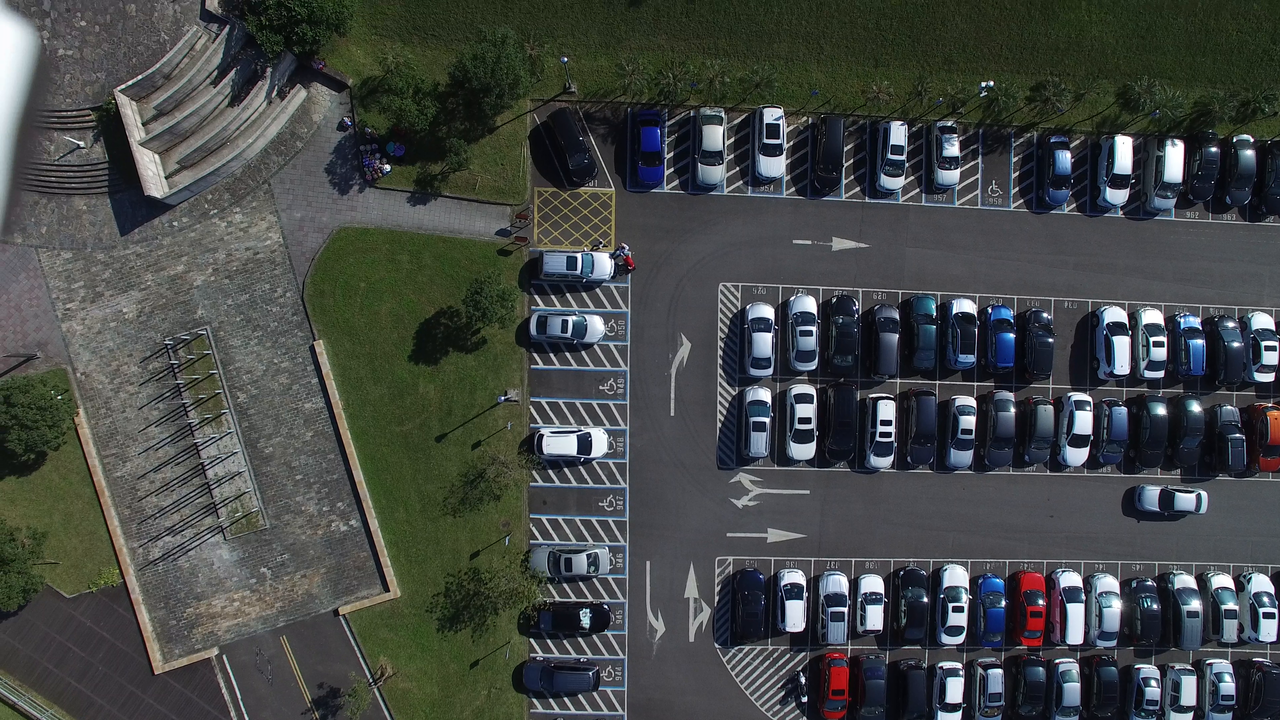

In [11]:
Image.open(base_dir + "Images/20161225_TPZ_00456.png")

### Cells Dataset - 1 (Synthetic Fluorescence Microscopy)

Image contains red dots on black background to display cells

Annotation - one red pixel to denote cell

In [12]:
from PIL import Image
import numpy as np

In [13]:
counts = []

base_dir = downloads_dir + 'cells/'
for i in range(1, 201):
    fname = base_dir + str(i).zfill(3) + "dots.png"
    image = Image.open(fname)
    img = np.array(image)
    
    counts.append(np.sum(img[:,:,0])/255)

counts = np.array(counts)

print("Total Images: 200")
print("Min Count: {}".format(np.min(counts)))
print("Max Count: {}".format(np.max(counts)))
print("Avg Count: {}".format(np.mean(counts)))

Total Images: 200
Min Count: 74.0
Max Count: 317.0
Avg Count: 175.96


In [14]:
# Image.open(base_dir + "100dots.png")

### Cells Dataset - 2

- Image Format is .pgm


- Annotation = Dot coordinates

In [15]:
import scipy.io as sio

In [16]:
base_dir = downloads_dir + 'CellDetect_v1.0/phasecontrast/'

train_count = []
for i in range(1, 12):
    fname = base_dir + 'trainPhasecontrast/im' + str(i).zfill(2) + '.mat'
    mat_contents = sio.loadmat(fname)
    train_count.append(mat_contents['gt'].shape[0])
train_count = np.array(train_count)

test_count = []
for i in range(1, 12):
    fname = base_dir + 'testPhasecontrast/im' + str(i).zfill(2) + '.mat'
    mat_contents = sio.loadmat(fname)
    test_count.append(mat_contents['gt'].shape[0])
test_count = np.array(test_count)

print("Total Training Images: 11")
print("Min Count: {}".format(np.min(train_count)))
print("Max Count: {}".format(np.max(train_count)))
print("Avg Count: {:.2f}".format(np.mean(train_count)))

print("\nTotal Test Images: 11")
print("Min Count: {}".format(np.min(test_count)))
print("Max Count: {}".format(np.max(test_count)))
print("Avg Count: {:.2f}".format(np.mean(test_count)))

Total Training Images: 11
Min Count: 38
Max Count: 166
Avg Count: 97.55

Total Test Images: 11
Min Count: 45
Max Count: 222
Avg Count: 105.09


In [17]:
# Image.open(base_dir + "trainPhasecontrast/im01.pgm")

### Penguins Dataset

(Quick Analysis)

Annotations = Head Coordinates

Avg. Count = 32

Max No. = 97

### Kaggle

#### Ship Satellite Images

Kaggle - https://www.kaggle.com/c/airbus-ship-detection

Annotations = Bounding Box

Total Ship Count = 131030

Avg. Count = 2.66

Max no. of ships = 15


#### Swiss Coins
Kaggle - https://www.kaggle.com/ai-first/swisscoins

- Total Images = 29
- No Annotation but total count is present.


#### Shape counts
Kaggle - https://inclass.kaggle.com/palatos/shaco-shape-counting

- Total Images = 45K
- Intersecting Images of colored circles and Squares.
- No annotation but total count is present.


#### Brazil Coins
Kaggle - https://www.kaggle.com/lgmoneda/br-coins

- 1577 Images
- No annotations

#### Proposal

Form data with these categories. Take 1000 images for each category.

- Cars
- Sheep
- Donut
- Carrot
- Book
- Banana
- Cow
- Person
- Penguins
- Ships